# one-hot编码转换
one-hot编码，是将符号编制转换为向量的基本方法。即将一个整数的索引联系到每个单词。
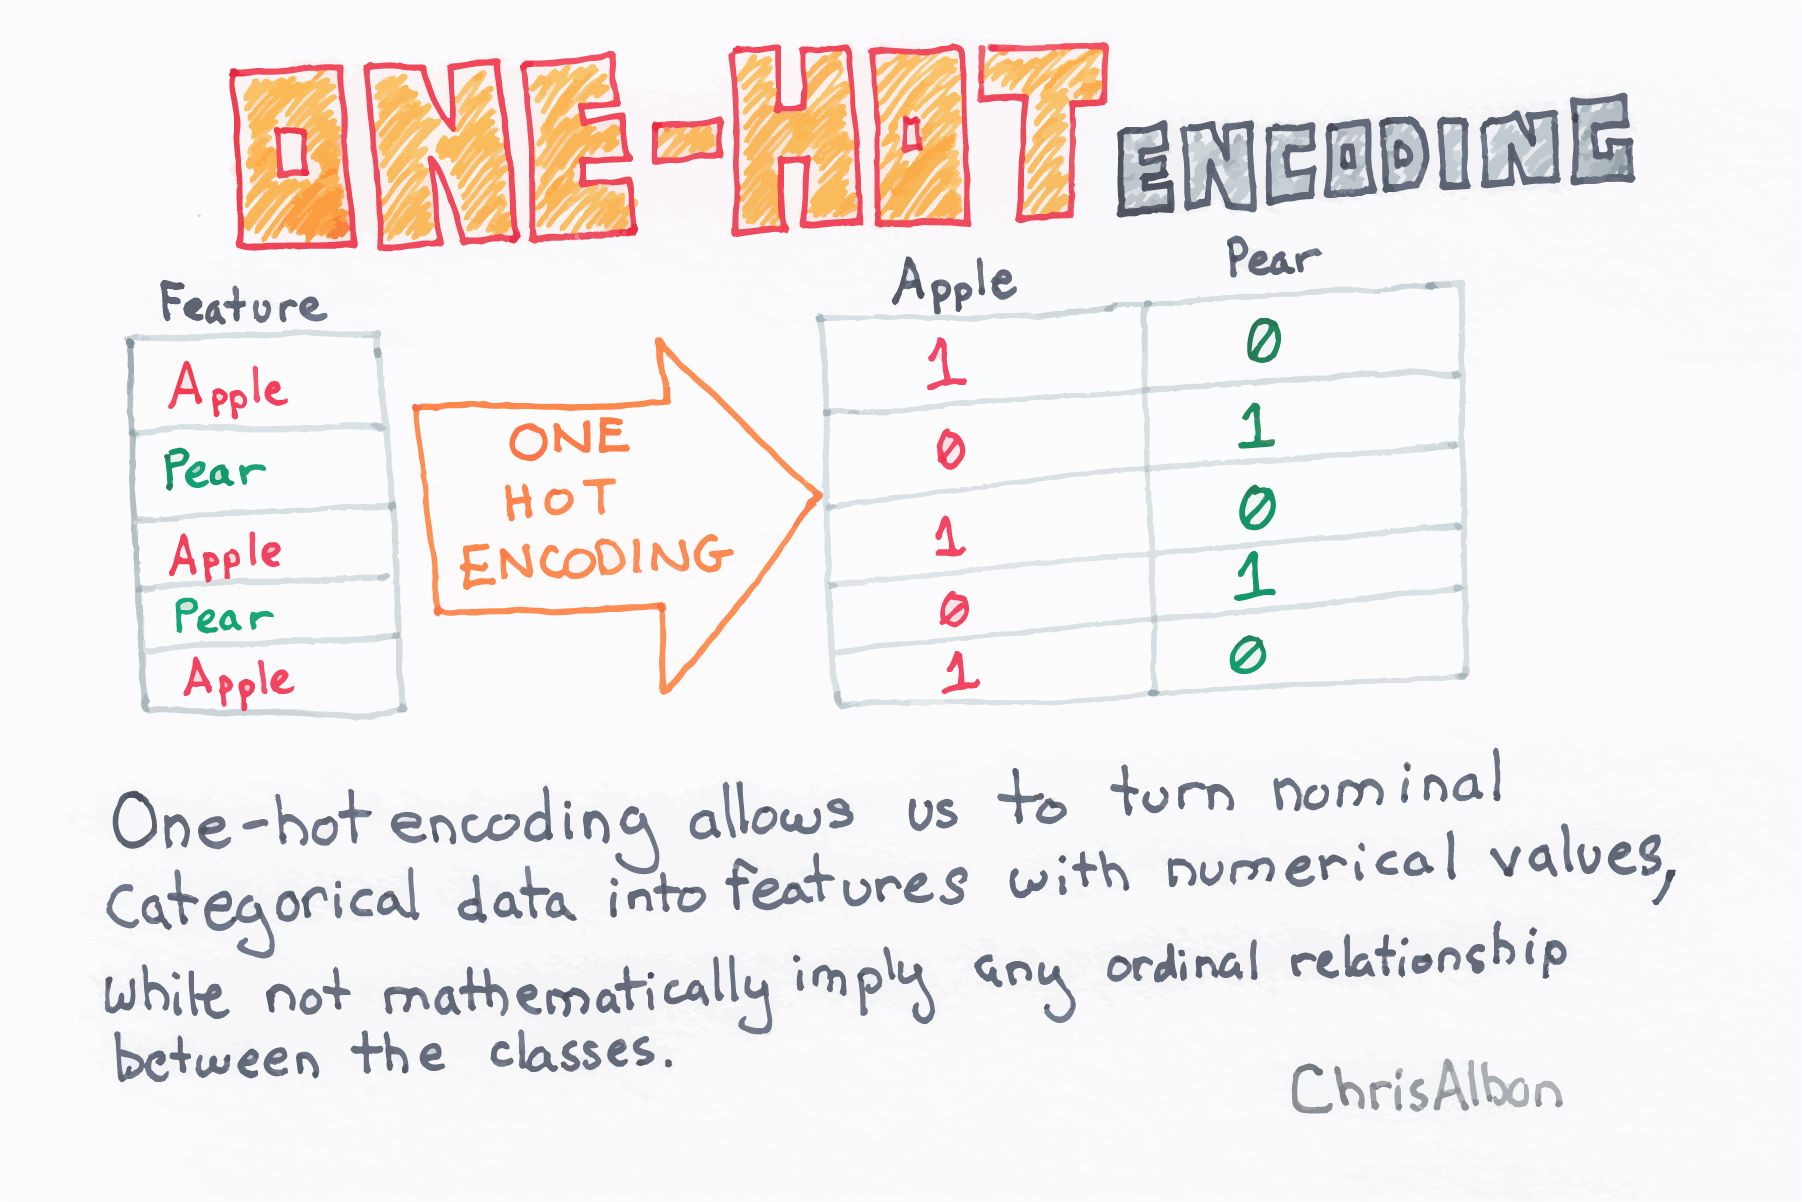
假设有五个单词：King，Queen，Man，Woman和Child。我们可以将单词'Queen'编码为：
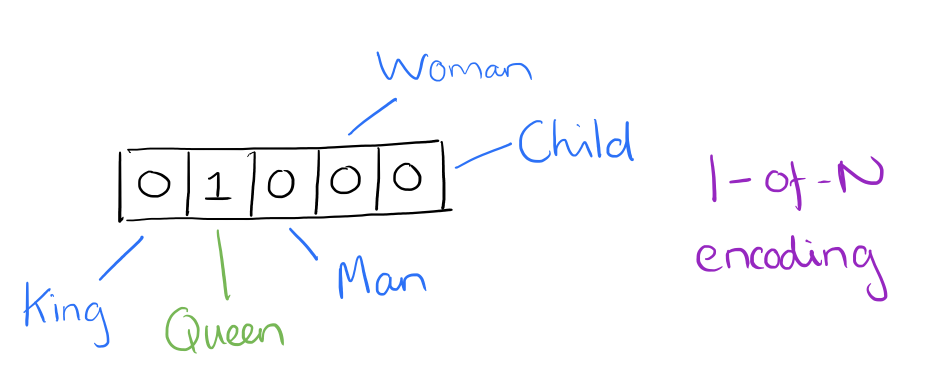
通过One-hot编码，可以把一个长度为5的向量来代表每个单字，而这个向量除了第i个索引的值是'1'，其余都是'0'。


In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

## word level的one-hot编码

In [42]:
import numpy as np

In [43]:
samples = ['the cat is sat on the mat.','the dog ate my homework.']
print(samples)
token_index = {}

['the cat is sat on the mat.', 'the dog ate my homework.']


In [44]:
for sample in samples:
    for word in sample.split():
        token_index[word] = len(token_index) + 1

In [45]:
token_index

{'the': 7,
 'cat': 2,
 'is': 3,
 'sat': 4,
 'on': 5,
 'mat.': 6,
 'dog': 7,
 'ate': 8,
 'my': 9,
 'homework.': 10}

In [46]:
max_length = 10

In [47]:
results = np.zeros((len(samples),max_length,max(token_index.values())+1))

In [48]:
results

array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

In [49]:
for i, sample in enumerate(samples):
    for j,word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i,j,index] = 1

In [50]:
results

array([[[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

In [51]:
token_index

{'the': 7,
 'cat': 2,
 'is': 3,
 'sat': 4,
 'on': 5,
 'mat.': 6,
 'dog': 7,
 'ate': 8,
 'my': 9,
 'homework.': 10}

In [52]:
len(results)

2

In [53]:
from sklearn import preprocessing

In [54]:
enc = preprocessing.LabelEncoder()

In [58]:
enc.fit(list(token_index.keys()))

LabelEncoder()

In [59]:
list(enc.classes_)

['ate', 'cat', 'dog', 'homework.', 'is', 'mat.', 'my', 'on', 'sat', 'the']

In [61]:
list(enc.inverse_transform([0,1,2,3,4,5,6]))

['ate', 'cat', 'dog', 'homework.', 'is', 'mat.', 'my']

## 字符级别的one-hot编码

In [16]:
import string
samples = ['The cat sat on the mat.',
           'the dog ate my homework.']
characters = string.printable
print(characters)

0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	



In [17]:
token_index = dict(zip(characters,range(1,len(characters) + 1)))
max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample[:max_length]):
        index = token_index.get(character)
        results[i, j, index] = 1.

In [18]:
print(token_index)

{'0': 1, '1': 2, '2': 3, '3': 4, '4': 5, '5': 6, '6': 7, '7': 8, '8': 9, '9': 10, 'a': 11, 'b': 12, 'c': 13, 'd': 14, 'e': 15, 'f': 16, 'g': 17, 'h': 18, 'i': 19, 'j': 20, 'k': 21, 'l': 22, 'm': 23, 'n': 24, 'o': 25, 'p': 26, 'q': 27, 'r': 28, 's': 29, 't': 30, 'u': 31, 'v': 32, 'w': 33, 'x': 34, 'y': 35, 'z': 36, 'A': 37, 'B': 38, 'C': 39, 'D': 40, 'E': 41, 'F': 42, 'G': 43, 'H': 44, 'I': 45, 'J': 46, 'K': 47, 'L': 48, 'M': 49, 'N': 50, 'O': 51, 'P': 52, 'Q': 53, 'R': 54, 'S': 55, 'T': 56, 'U': 57, 'V': 58, 'W': 59, 'X': 60, 'Y': 61, 'Z': 62, '!': 63, '"': 64, '#': 65, '$': 66, '%': 67, '&': 68, "'": 69, '(': 70, ')': 71, '*': 72, '+': 73, ',': 74, '-': 75, '.': 76, '/': 77, ':': 78, ';': 79, '<': 80, '=': 81, '>': 82, '?': 83, '@': 84, '[': 85, '\\': 86, ']': 87, '^': 88, '_': 89, '`': 90, '{': 91, '|': 92, '}': 93, '~': 94, ' ': 95, '\t': 96, '\n': 97, '\r': 98, '\x0b': 99, '\x0c': 100}


In [19]:
print(token_index['T'])
print(token_index['h'])
print(token_index['e'])

56
18
15
